In [1]:
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

# CHEKING DISK STORAGE

In [2]:
import shutil

# Get disk space details
total, used, free = shutil.disk_usage("/")

# Convert to human-readable format
def format_size(size):
    for unit in ['B', 'KB', 'MB', 'GB', 'TB']:
        if size < 1024:
            return f"{size:.2f} {unit}"
        size /= 1024

print()
print(f"Total Space: {format_size(total)}")
print(f"Used Space: {format_size(used)}")
print(f"Free Space: {format_size(free)}")
print()


Total Space: 915.32 GB
Used Space: 727.96 GB
Free Space: 140.80 GB



In [3]:
import os

def get_directory_size(directory):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(directory):
        for file in filenames:
            file_path = os.path.join(dirpath, file)
            # Add file size, skipping broken symbolic links
            if os.path.exists(file_path):
                total_size += os.path.getsize(file_path)
    return total_size

def print_directory_size(directory):
    size_bytes = get_directory_size(directory)
    # Convert bytes to a human-readable format (KB, MB, GB)
    for unit in ['B', 'KB', 'MB', 'GB', 'TB']:
        if size_bytes < 1024:
            print(f"Size of '{directory}': {size_bytes:.2f} {unit}")
            break
        size_bytes /= 1024

print()
# Example usage
preprocessed_files_path = "data/train_data/preprocessed_files"  # Change this to your target directory
print_directory_size(preprocessed_files_path)

preprocessed_files_path = "executions"  # Change this to your target directory
print_directory_size(preprocessed_files_path)
print()


Size of 'data/train_data/preprocessed_files': 4.33 GB
Size of 'executions': 14.83 GB



# SPECIFY EXECUTION ID TO EVALUATE


In [4]:
import os

############### EXECUTION SETTINGS ###############

PARENT_EXECUTION_DIR = "executions/swin_unetr/tuning-train-test"

############## EXECUTION ID ######################

EXECUTION_ID = 174 # Update ID

execution_dir = os.path.join(PARENT_EXECUTION_DIR, f"id={EXECUTION_ID}")
print()
print(f"Execution to evaluate: {execution_dir}")
print()


Execution to evaluate: executions/swin_unetr/tuning-train-test/id=174



# LOAD EXECUTION SETTINGS

In [5]:
import json
import pprint

# Load JSON
info_execution_json_file_path = os.path.join(execution_dir, "info_execution.json")

with open(info_execution_json_file_path, "r") as json_file:
    info_execution = json.load(json_file)

# pprint.pprint(info_execution, sort_dicts=False, width=100)
print(info_execution)
print()

################### DATA SETTINGS #################

DATA_DIR = info_execution["DATA_SETTINGS"]["DATA_DIR"] 
# Directory where the samples (data and labels folders) and the metadata.json file are located.

NUM_WORKERS = info_execution["DATA_SETTINGS"]["NUM_WORKERS"]
# Number of logical CPU Cores used for parallelizing data laoding


{'INFO_EXECUTION': {'PARENT_EXECUTION_DIR': 'executions/swin_unetr/tuning-train-test', 'EXECUTION_ID': 174, 'EXECUTION_DIR': 'id=174'}, 'DATA_SETTINGS': {'DATA_DIR': 'data/train_data', 'METADATA_DATASET': 'metadata_37_samples.json', 'K_FOLDS': 6, 'NUM_WORKERS': 4, 'SAMPLES_DATASET': ['R_002', 'R_003', 'R_004', 'R_005', 'R_006', 'R_007', 'R_008', 'R_009', 'R_010', 'R_011', 'R_012', 'R_013', 'R_014', 'R_015', 'R_016', 'R_017', 'R_019', 'R_020', 'Z_002', 'Z_003', 'Z_004', 'Z_005', 'Z_006', 'Z_007', 'Z_008', 'Z_009', 'Z_010', 'Z_011', 'Z_012', 'Z_013', 'Z_014', 'Z_015', 'Z_016', 'Z_017', 'Z_018', 'Z_019', 'Z_020'], 'VALIDATION_SET': ['R_002', 'R_003', 'R_011', 'Z_005', 'Z_008', 'Z_014', 'Z_020'], 'TRAIN_TEST_SPLITS': {'SPLIT_0': {'TRAIN_SET': ['R_004', 'R_005', 'R_007', 'R_008', 'R_009', 'R_013', 'R_014', 'R_015', 'R_016', 'R_017', 'R_019', 'R_020', 'Z_002', 'Z_003', 'Z_006', 'Z_007', 'Z_009', 'Z_010', 'Z_011', 'Z_012', 'Z_015', 'Z_016', 'Z_018', 'Z_019'], 'TEST_SET': ['R_006', 'R_010', 'R

# LOAD DATA SPLITTING INFO

In [6]:
import json
import os


# Load metadata JSON file
metadata_json_path = os.path.join(info_execution["DATA_SETTINGS"]["DATA_DIR"], info_execution["DATA_SETTINGS"]["METADATA_DATASET"])
with open(metadata_json_path, "r") as f:
    metadata = json.load(f)

# Restore validation files
validation_files_original_copy = {sample: metadata[sample] for sample in info_execution["DATA_SETTINGS"]["VALIDATION_SET"]}

# Restore train-test splits
train_test_splits_orginal_copy = []
for split_key, split_data in info_execution["DATA_SETTINGS"]["TRAIN_TEST_SPLITS"].items():
    train_files = {sample: metadata[sample] for sample in split_data["TRAIN_SET"]}
    test_files = {sample: metadata[sample] for sample in split_data["TEST_SET"]}
    train_test_splits_orginal_copy.append((train_files, test_files))

print("✅ Successfully restored `train_test_splits_orginal_copy` and `validation_files_original_copy` from JSON!")

print()

✅ Successfully restored `train_test_splits_orginal_copy` and `validation_files_original_copy` from JSON!



# Import SwinUNETR_AIRT LIGHTNING MODEL

In [7]:
import importlib
from models.swin_unetr import Swin_UNETR_AIRT_lightning_model

# Reload the module (if necessary)
importlib.reload(Swin_UNETR_AIRT_lightning_model)

# Import the class from the reloaded module
from models.swin_unetr.Swin_UNETR_AIRT_lightning_model import SwinUNETR_AIRT_LightningModel
print()

# Import SwinUNETR_AIRT DATASET

In [8]:
import importlib
from models.swin_unetr import Swin_UNETR_AIRT_dataset

# Reload the module (if necessary)
importlib.reload(Swin_UNETR_AIRT_dataset)

# Import the class from the reloaded module
from models.swin_unetr.Swin_UNETR_AIRT_dataset import SwinUNETR_AIRT_Dataset
print()

# Importing libraries

In [9]:
import os
import json
import time
import shutil
import gc
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns  # Used for plotting
from PIL import Image  # Used to save images
from datetime import timedelta, datetime

import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import EarlyStopping, ModelCheckpoint
from pytorch_lightning.loggers import CSVLogger
import optuna

# Functions needed

In [10]:
import importlib
# Own library
import utils.data_utils
importlib.reload(utils.data_utils)
from utils.data_utils import custom_collate

# Function to apply the viridis colormap and convert to uint8
def apply_colormap_and_normalize(array, cmap, vmin, vmax):
    norm_array = (array - vmin) / (vmax - vmin)  # Normalize to [0, 1]
    norm_array = np.clip(norm_array, 0, 1)  # Clip values to avoid overflow
    colormap = plt.get_cmap(cmap)
    rgba_img = colormap(norm_array)  # Apply colormap, returns RGBA
    rgb_img = (rgba_img[:, :, :3] * 255).astype("uint8")  # Convert to RGB
    return rgb_img

# BEST TRIAL IN STUDY

## Summary

In [11]:
tuning_dir = os.path.join(execution_dir, 'tuning')
best_trial_json_path = os.path.join(tuning_dir, "best_trial", "best_trial_summary_info.json")

# Load JSON
with open(best_trial_json_path, "r") as json_file:
    best_trial_config = json.load(json_file)

# Extract the best trial number and validation loss
best_trial_info = best_trial_config.get("MODEL_INFO", {})
best_trial_training_config = best_trial_config.get("TRAINING_CONFIG", {})

val_loss = best_trial_config.get("VAL_LOSS")
val_loss = float(val_loss) if isinstance(val_loss, (int, float)) else None  # Convert only if it's a number

print()
print(f"{'=' * 50}")
print(f"{'=' * 18} BEST TRIAL: {best_trial_config.get('TRIAL_ID', 'N/A')} {'=' * 17}")
print(f"{'=' * 16} Val. Loss: {val_loss:.4f} {'=' * 16}" if val_loss is not None else f"{'=' * 16} Val. Loss: N/A {'=' * 16}")
print(f"{'=' * 50}")
print()

print(f"Total Parameters: {best_trial_info.get('model_total_params', 'N/A')}")
print(f"Trainable Parameters: {best_trial_info.get('model_trainable_params', 'N/A')}")
print(f"Non-Trainable Parameters: {best_trial_info.get('model_non_trainable_params', 'N/A')}")
print(f"FLOPs: {best_trial_info.get('model_gflops_inference', 0.0):.3f} GFLOPs")
print()
print()

# Pretty-print the configurations
pprint.pprint(best_trial_config, sort_dicts=False, width=100)

print()


================== BEST TRIAL: 45 =================
================ Val. Loss: 0.1270 ================

Total Parameters: 4184149
Trainable Parameters: 4184149
Non-Trainable Parameters: 0
FLOPs: 12.620 GFLOPs


{'TRIAL_ID': 45,
 'VAL_LOSS': 0.1270466893911361,
 'MODEL_INFO': {'model_total_params': 4184149,
                'model_trainable_params': 4184149,
                'model_non_trainable_params': 0,
                'model_gflops_inference': 12.619788288},
 'TRAINING_CONFIG': {'lr_optimizer': 0.00010772108579100076,
                     'weight_decay_optimizer': 4.400603422114814e-06,
                     'warmup_epochs_lr_scheduler': 7,
                     'max_training_epochs': 10000,
                     'patience_epochs_early_stopping': 20,
                     'batch_size_training': 3,
                     'batch_size_inference': 1,
                     'num_batches_grad_accumulation': 2,
                     'overlap_training': [0.0, 0.0],
                     'overlap_inf

## Validation Results (Ground Truth vs Prediction)

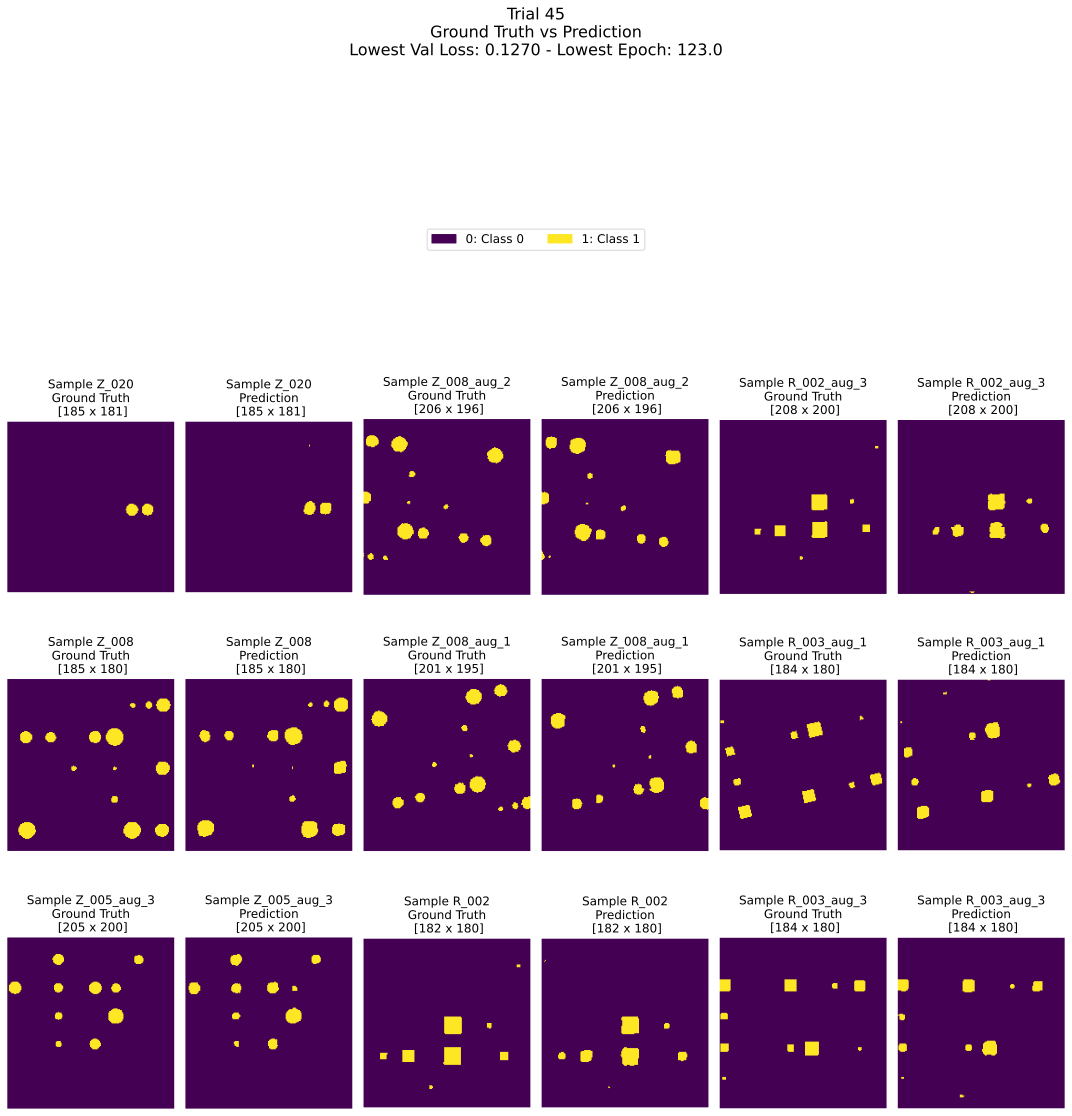

In [12]:
from IPython.display import SVG

svg_file = os.path.join(tuning_dir, "best_trial", f"validation_gt_vs_pred.svg")
# Display the SVG file
SVG(svg_file)  # Replace with your SVG file path

## Training vs Validation Loss Evolution

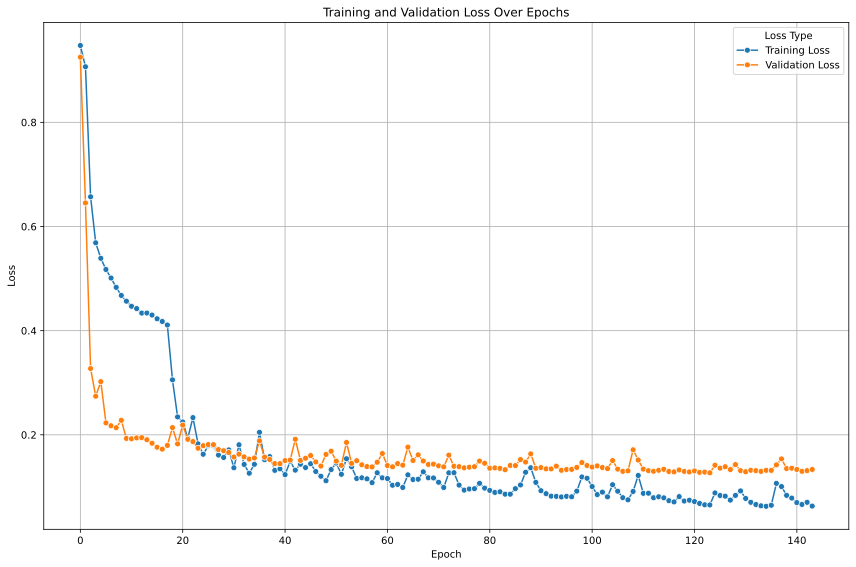

In [13]:
from IPython.display import SVG

svg_file = os.path.join(tuning_dir, "best_trial", f"train_val_loss_evolution.svg")
# Display the SVG file
SVG(svg_file)  # Replace with your SVG file path

# EVALUATION

JSON file successfully updated at: executions/swin_unetr/tuning-train-test/id=174/inference_summary.json
Inference starts at: 2025-03-31 14:07:55.843349


JSON file successfully updated at: executions/swin_unetr/tuning-train-test/id=174/inference_summary.json
JSON file successfully updated at: executions/swin_unetr/tuning-train-test/id=174/inference_summary.json

========== INFERENCE DATA PREPARATION ==========

 SAMPLES: dict_keys(['R_006', 'R_010', 'R_012', 'Z_004', 'Z_013', 'Z_017'])

 SELECTED INFERENCE SAMPLE: R_006

==> DATA PREPOCESSING STARTS

Data preprocessing started at: 2025-03-31 14:07:55.850828

The directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files' did not exist and has been created.

The directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr' did not exist and has been created.

The directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/prepro

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



R_006 loaded (preprocessing took 1.60 seconds)


The JSON file '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference/preprocessed_info.json' has been updated.

==> DATA PREPOCESSING FINISHED

Data preprocessing ended at: 2025-03-31 14:07:57.446942

Total execution time for data preprocessing: 0:00:01.596114


========== INFERENCE STARTS ==========

Found checkpoint: executions/swin_unetr/tuning-train-test/id=174/train_test_split_0/best-checkpoint-epoch=76-val_loss=0.15.ckpt


Testing: |                                                                                                    …

Starting testing epoch...

==> (TESTING) Average Dice Loss (include_background=[False]): 0.090679

==> (TESTING) Average Mean IoU (include_background=[False]): 0.834312

==> (TESTING) Average Dice Coefficient (include_background=[False]): 0.909673

==> (TESTING) Average FPR (include_background=[False]): 0.005214

==> (TESTING) Average TPR/Recall (include_background=[False]): 0.895543

==> (TESTING) Average Precision (include_background=[False]): 0.924257

Finished testing epoch
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     test_dice_epoch        0.9096729755401611
     test_fpr_epoch        0.0052136643789708614
     test_loss_epoch        0.09067940711975098
   test_mean_iou_epoch      0.8343120813369751
  test_precision_epoch      0.9242565035

/tmp/ipykernel_4965/1448268823.py:237: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap("viridis", num_classes)


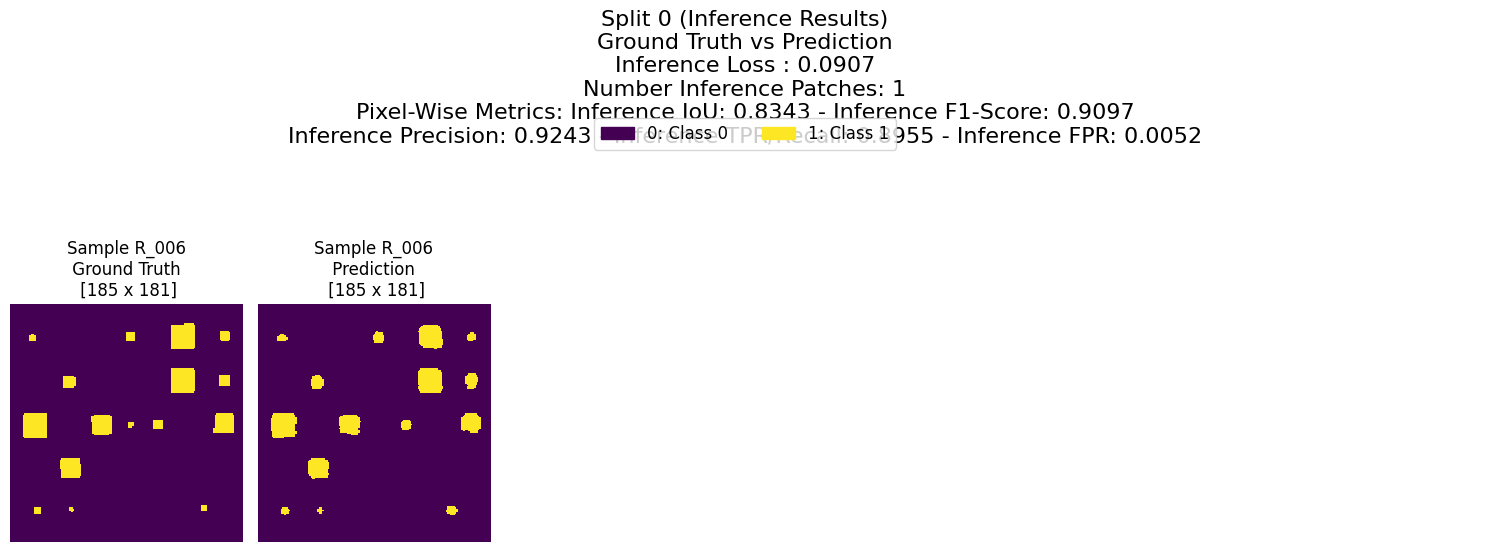

JSON file successfully updated at: executions/swin_unetr/tuning-train-test/id=174/inference_summary.json
JSON file successfully updated at: executions/swin_unetr/tuning-train-test/id=174/inference_summary.json

========== INFERENCE DATA PREPARATION ==========

 SAMPLES: dict_keys(['R_008', 'R_014', 'R_019', 'Z_011', 'Z_015', 'Z_016'])

 SELECTED INFERENCE SAMPLE: R_008

==> DATA PREPOCESSING STARTS

Data preprocessing started at: 2025-03-31 14:07:59.970230

Removing the directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' and its content ...
The directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' and its content have been removed.
The directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' did not exist and has been created.

Preprocessing sample R_008 ...



Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



R_008 loaded (preprocessing took 1.56 seconds)


The JSON file '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference/preprocessed_info.json' has been updated.

==> DATA PREPOCESSING FINISHED

Data preprocessing ended at: 2025-03-31 14:08:01.534993

Total execution time for data preprocessing: 0:00:01.564763


========== INFERENCE STARTS ==========

Found checkpoint: executions/swin_unetr/tuning-train-test/id=174/train_test_split_1/best-checkpoint-epoch=85-val_loss=0.14.ckpt


Testing: |                                                                                                    …

Starting testing epoch...

==> (TESTING) Average Dice Loss (include_background=[False]): 0.130441

==> (TESTING) Average Mean IoU (include_background=[False]): 0.770383

==> (TESTING) Average Dice Coefficient (include_background=[False]): 0.870301

==> (TESTING) Average FPR (include_background=[False]): 0.001603

==> (TESTING) Average TPR/Recall (include_background=[False]): 0.792356

==> (TESTING) Average Precision (include_background=[False]): 0.965254

Finished testing epoch
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     test_dice_epoch        0.8703007698059082
     test_fpr_epoch        0.0016032321145758033
     test_loss_epoch        0.13044053316116333
   test_mean_iou_epoch      0.7703827023506165
  test_precision_epoch      0.9652536511

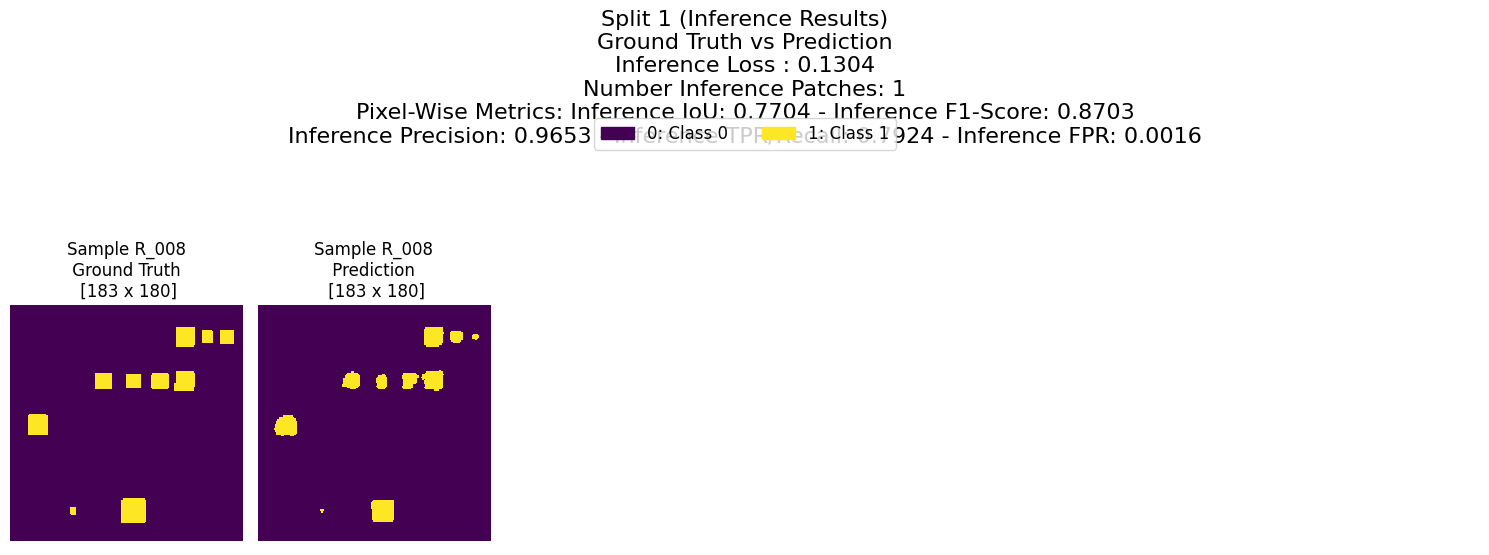

JSON file successfully updated at: executions/swin_unetr/tuning-train-test/id=174/inference_summary.json
JSON file successfully updated at: executions/swin_unetr/tuning-train-test/id=174/inference_summary.json

========== INFERENCE DATA PREPARATION ==========

 SAMPLES: dict_keys(['R_009', 'R_015', 'R_020', 'Z_006', 'Z_009', 'Z_019'])

 SELECTED INFERENCE SAMPLE: R_009

==> DATA PREPOCESSING STARTS

Data preprocessing started at: 2025-03-31 14:08:04.070704

Removing the directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' and its content ...
The directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' and its content have been removed.
The directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' did not exist and has been created.

Preprocessing sample R_009 ...



Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



R_009 loaded (preprocessing took 1.59 seconds)


The JSON file '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference/preprocessed_info.json' has been updated.

==> DATA PREPOCESSING FINISHED

Data preprocessing ended at: 2025-03-31 14:08:05.662427

Total execution time for data preprocessing: 0:00:01.591723


========== INFERENCE STARTS ==========

Found checkpoint: executions/swin_unetr/tuning-train-test/id=174/train_test_split_2/best-checkpoint-epoch=51-val_loss=0.15.ckpt


Testing: |                                                                                                    …

Starting testing epoch...

==> (TESTING) Average Dice Loss (include_background=[False]): 0.118676

==> (TESTING) Average Mean IoU (include_background=[False]): 0.790622

==> (TESTING) Average Dice Coefficient (include_background=[False]): 0.883070

==> (TESTING) Average FPR (include_background=[False]): 0.004100

==> (TESTING) Average TPR/Recall (include_background=[False]): 0.885068

==> (TESTING) Average Precision (include_background=[False]): 0.881081

Finished testing epoch
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     test_dice_epoch        0.8830699920654297
     test_fpr_epoch        0.004100015386939049
     test_loss_epoch        0.11867552995681763
   test_mean_iou_epoch      0.7906224727630615
  test_precision_epoch      0.88108110427

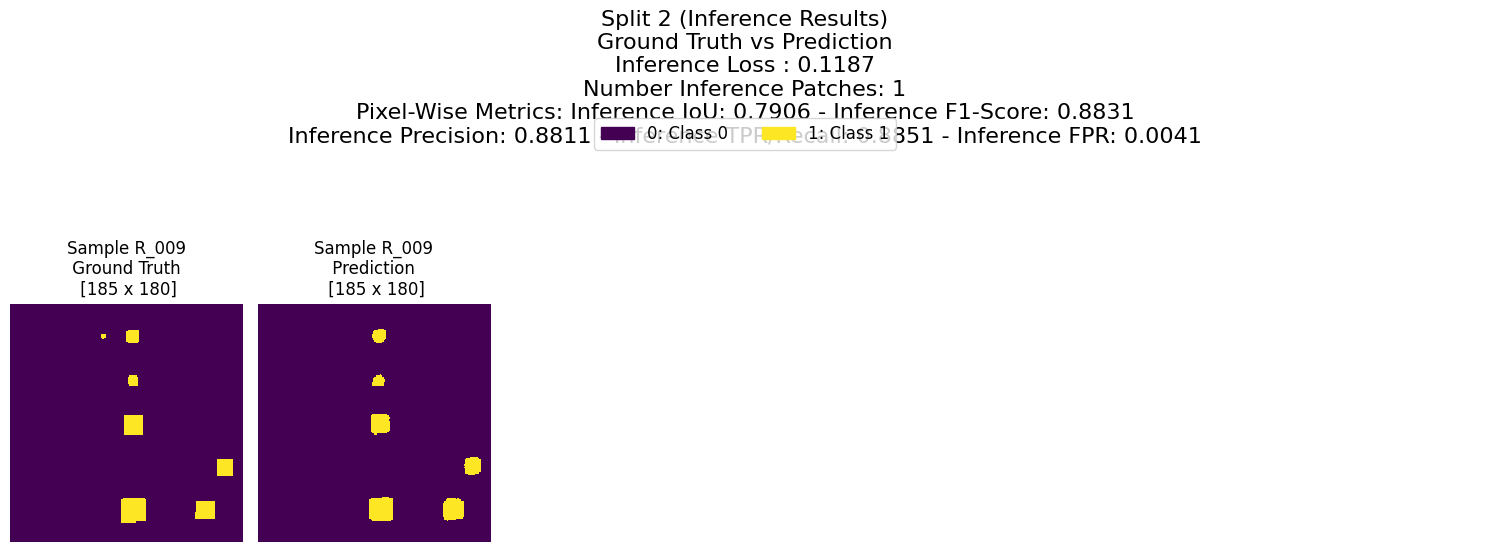

JSON file successfully updated at: executions/swin_unetr/tuning-train-test/id=174/inference_summary.json
JSON file successfully updated at: executions/swin_unetr/tuning-train-test/id=174/inference_summary.json

========== INFERENCE DATA PREPARATION ==========

 SAMPLES: dict_keys(['R_004', 'R_005', 'R_016', 'Z_002', 'Z_007', 'Z_010'])

 SELECTED INFERENCE SAMPLE: R_004

==> DATA PREPOCESSING STARTS

Data preprocessing started at: 2025-03-31 14:08:08.258495

Removing the directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' and its content ...
The directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' and its content have been removed.
The directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' did not exist and has been created.

Preprocessing sample R_004 ...



Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



R_004 loaded (preprocessing took 1.57 seconds)


The JSON file '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference/preprocessed_info.json' has been updated.

==> DATA PREPOCESSING FINISHED

Data preprocessing ended at: 2025-03-31 14:08:09.836578

Total execution time for data preprocessing: 0:00:01.578083


========== INFERENCE STARTS ==========

Found checkpoint: executions/swin_unetr/tuning-train-test/id=174/train_test_split_3/best-checkpoint-epoch=62-val_loss=0.14.ckpt


Testing: |                                                                                                    …

Starting testing epoch...

==> (TESTING) Average Dice Loss (include_background=[False]): 0.096838

==> (TESTING) Average Mean IoU (include_background=[False]): 0.826255

==> (TESTING) Average Dice Coefficient (include_background=[False]): 0.904863

==> (TESTING) Average FPR (include_background=[False]): 0.008235

==> (TESTING) Average TPR/Recall (include_background=[False]): 0.915312

==> (TESTING) Average Precision (include_background=[False]): 0.894649

Finished testing epoch
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     test_dice_epoch        0.9048625826835632
     test_fpr_epoch         0.00823475606739521
     test_loss_epoch        0.09683758020401001
   test_mean_iou_epoch      0.8262548446655273
  test_precision_epoch      0.89464884996

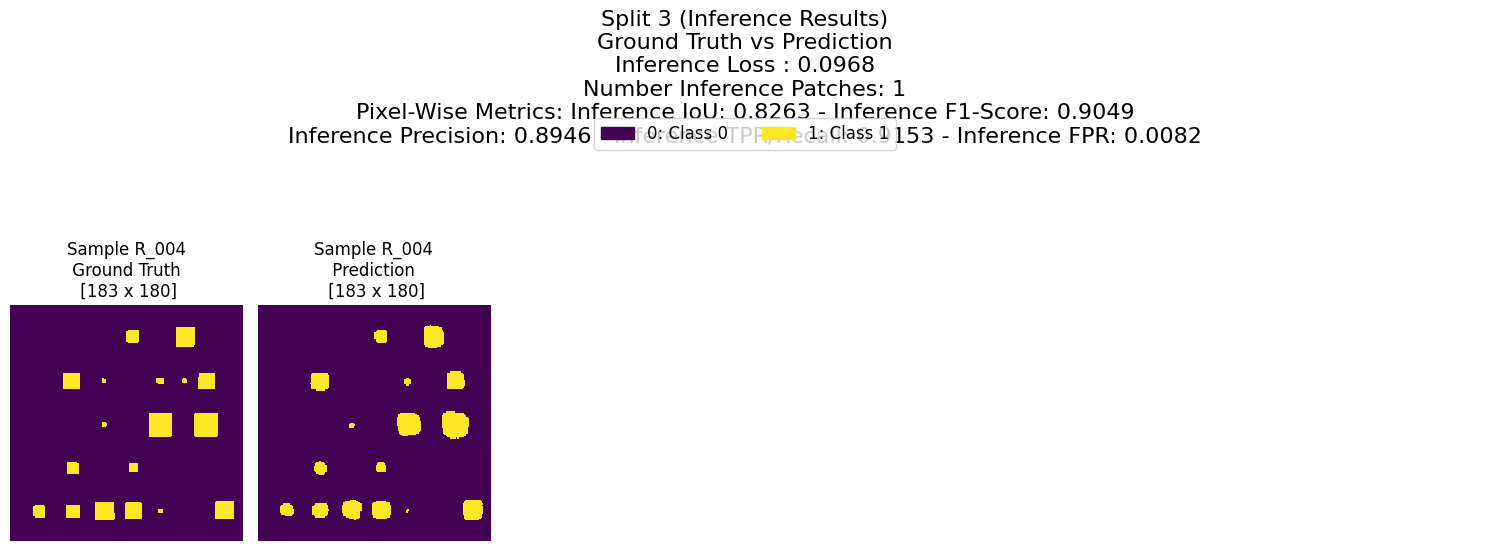

JSON file successfully updated at: executions/swin_unetr/tuning-train-test/id=174/inference_summary.json
JSON file successfully updated at: executions/swin_unetr/tuning-train-test/id=174/inference_summary.json

========== INFERENCE DATA PREPARATION ==========

 SAMPLES: dict_keys(['R_007', 'R_013', 'R_017', 'Z_003', 'Z_012', 'Z_018'])

 SELECTED INFERENCE SAMPLE: R_007

==> DATA PREPOCESSING STARTS

Data preprocessing started at: 2025-03-31 14:08:12.453883

Removing the directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' and its content ...
The directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' and its content have been removed.
The directory '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference' did not exist and has been created.

Preprocessing sample R_007 ...



Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



R_007 loaded (preprocessing took 1.60 seconds)


The JSON file '/home/adrian/AIRT_Segmentation_Project/experimenting/data/train_data/preprocessed_files/swin_unetr/inference/preprocessed_info.json' has been updated.

==> DATA PREPOCESSING FINISHED

Data preprocessing ended at: 2025-03-31 14:08:14.053190

Total execution time for data preprocessing: 0:00:01.599307


========== INFERENCE STARTS ==========

Found checkpoint: executions/swin_unetr/tuning-train-test/id=174/train_test_split_4/best-checkpoint-epoch=104-val_loss=0.15.ckpt


Testing: |                                                                                                    …

Starting testing epoch...

==> (TESTING) Average Dice Loss (include_background=[False]): 0.164380

==> (TESTING) Average Mean IoU (include_background=[False]): 0.714801

==> (TESTING) Average Dice Coefficient (include_background=[False]): 0.833684

==> (TESTING) Average FPR (include_background=[False]): 0.005667

==> (TESTING) Average TPR/Recall (include_background=[False]): 0.918083

==> (TESTING) Average Precision (include_background=[False]): 0.763496

Finished testing epoch
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     test_dice_epoch        0.8336842060089111
     test_fpr_epoch        0.005667118355631828
     test_loss_epoch        0.16437995433807373
   test_mean_iou_epoch      0.7148014307022095
  test_precision_epoch      0.76349616050

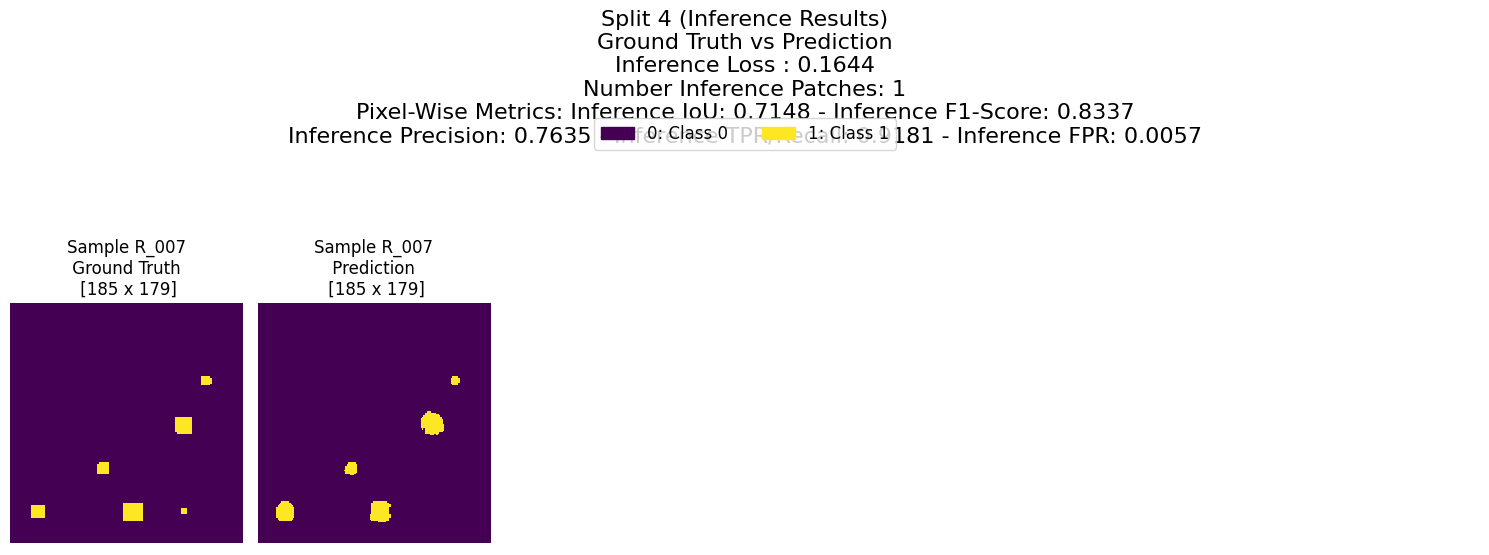

JSON file successfully updated at: executions/swin_unetr/tuning-train-test/id=174/inference_summary.json

Inference finishes at: 2025-03-31 14:08:16.663963




In [25]:
def update_summary_json_file(data):
    """
    Overwrites the JSON file on disk with the updated data.

    Parameters:
    - data (dict): The updated dictionary to write to the file.
    """
    try:
        # Ensure the directory exists
        json_path = os.path.join(execution_dir, "inference_summary.json")

        # Write the updated data to the file, overwriting it
        with open(json_path, 'w') as json_file:
            json.dump(data, json_file, indent=4)

        print(f"JSON file successfully updated at: {json_path}")

    except Exception as e:
        print(f"An error occurred while updating the JSON file: {e}")

# Generate the evaluation summary
inference_summary = {
    "total_execution_time_seconds": None,
    "splits": [],
    "average_inference_loss": None,
    "average_inference_mean_iou": None,
    "average_inference_dice_coefficient": None,
    "average_inference_fpr": None,
    "average_inference_time_seconds": None
}
update_summary_json_file(inference_summary)

# Measure start training time
start_execution_time = time.time()

print(f"Inference starts at: {datetime.now()}\n")
print()

for split_idx, (train_files, test_files) in enumerate(train_test_splits_orginal_copy):

    # Clear the GPU cache between splits
    torch.cuda.empty_cache()

    split_details = {
        "split_index": split_idx,
        "inference_samples": None,
        "inference_loss": None,
        "inference_mean_iou": None,
        "inference_dice_coefficient": None,
        "inference_fpr": None,
        "inference_time_seconds": None
    }

    inference_summary["splits"].append(split_details)
    update_summary_json_file(inference_summary)
       
    inference_summary["splits"][split_idx]["test_samples"] = list(test_files.keys())

    update_summary_json_file(inference_summary)    

    ############################################################################################
    ################################### INFERENCE DATA PREPARATION ###############################
    ############################################################################################
    
    # Measure start training time
    start_time = time.time()
    
    print()
    print(f"{'=' * 10} INFERENCE DATA PREPARATION {'=' * 10}")
    print()
    
    print(f" SAMPLES: {test_files.keys()}")
    print()

    selected_inference_sample = list(test_files.keys())[0]

    print(f" SELECTED INFERENCE SAMPLE: {selected_inference_sample}")
    print()
    
    # Create a new dictionary with just that key
    test_files = {selected_inference_sample: test_files[selected_inference_sample]}
        
    test_dataset = SwinUNETR_AIRT_Dataset(
        is_inference_mode = True,
        augmentation = False,
        metadata_dict_with_files_selected=test_files,
        data_dir=DATA_DIR,
        model_input_dims=best_trial_config["ARCHITECTURE_CONFIG"]["model_input_dimensions"],
        overlap = best_trial_config["TRAINING_CONFIG"]["overlap_inference"],
        preprocessing_strategy = best_trial_config["TRAINING_CONFIG"]["pre_processing_strategy"]
    )
       
    test_loader = DataLoader(test_dataset, batch_size=1, collate_fn=custom_collate, num_workers=NUM_WORKERS)

    ####################################################################################
    ############################## INFERENCE #############################################
    ####################################################################################
    
    print()
    print(f"{'=' * 10} INFERENCE STARTS {'=' * 10}")
    print()

    split_dir = os.path.join(execution_dir, f"train_test_split_{split_idx}")

    # Model checkpoint callback    
    checkpoint_callback = ModelCheckpoint(
        monitor='val_loss',
        dirpath=split_dir,
        filename="best-checkpoint-{epoch:02d}-{val_loss:.2f}",
        save_top_k=1,
        mode='min'
    )
    
    # Early stopping callback
    early_stopping_callback = EarlyStopping(
        monitor='val_loss',
        patience=best_trial_config["TRAINING_CONFIG"]["patience_epochs_early_stopping"],
        mode='min'
    )
    
    # Define logger
    logger = CSVLogger(
        save_dir=split_dir,
        name="",
        version="")
    
    trainer = Trainer(
        max_epochs=best_trial_config["TRAINING_CONFIG"]["max_training_epochs"],
        callbacks=[checkpoint_callback, early_stopping_callback],
        log_every_n_steps=1, # log every n batches
        logger=logger,
        precision="16-mixed",  # Enable FP16 mixed precision
        accumulate_grad_batches=best_trial_config["TRAINING_CONFIG"]["num_batches_grad_accumulation"],
        #max_time="00:00:05:00"  # Limit TIME (DD:HH:MM:SS format)
    )
            
    
    # Find all .ckpt files in the directory
    ckpt_files = [filename for filename in os.listdir(split_dir) if filename.endswith('.ckpt')]
    
    # Handle different cases
    if not ckpt_files:
        raise FileNotFoundError(f"No .ckpt file found in the directory: {split_dir}")
    elif len(ckpt_files) > 1:
        raise RuntimeError(f"Multiple .ckpt files found in the directory: {split_dir} -> {ckpt_files}")
    else:
        model_checkpoint_path = os.path.join(split_dir, ckpt_files[0])
        print(f"Found checkpoint: {model_checkpoint_path}")
    
    # Load the best model
    best_model = SwinUNETR_AIRT_LightningModel.load_from_checkpoint(
        checkpoint_path=model_checkpoint_path,
        
        # Training Configuration
        training_config=best_trial_config["TRAINING_CONFIG"],            
        # Architecture Configuration
        architecture_config=best_trial_config["ARCHITECTURE_CONFIG"],            
        # Attention Configuration
        attention_config=best_trial_config["ATTENTION_CONFIG"],
        # Normalization Configuration
        normalization_config=best_trial_config["NORMALIZATION_CONFIG"],         
        # Regularization Configuration
        regularization_config=best_trial_config["REGULARIZATION_CONFIG"]
    )
    
    test_results = trainer.test(best_model, dataloaders=test_loader)[0]
    
    # Measure end training time
    end_time = time.time()
    
    # Calculate and print the elapsed time
    inference_elapsed_time = end_time - start_time
    
    print(f"Inference completed in {inference_elapsed_time // 3600:.0f}h {inference_elapsed_time % 3600 // 60:.0f}m {inference_elapsed_time % 60:.0f}s")
    
    print()
    print(f"{'=' * 10} INFERENCE FINISHED {'=' * 10}")
    print()

    inference_summary["splits"][split_idx]["inference_loss"] = test_results["test_loss_epoch"]
    inference_summary["splits"][split_idx]["inference_mean_iou"] = test_results["test_mean_iou_epoch"]
    inference_summary["splits"][split_idx]["inference_dice_coefficient"] = test_results["test_dice_epoch"]
    inference_summary["splits"][split_idx]["inference_fpr"] = test_results["test_fpr_epoch"]
    inference_summary["splits"][split_idx]["inference_tpr_recall"] = test_results["test_tpr_recall_epoch"]
    inference_summary["splits"][split_idx]["inference_precision"] = test_results["test_precision_epoch"]
    inference_summary["splits"][split_idx]["inference_time_seconds"] = inference_elapsed_time
    update_summary_json_file(inference_summary)

    ####################################################################################
    ############################## PLOTTING TEST RESULTS ###############################
    ####################################################################################

    inference_folder = os.path.join(split_dir, "inference_results")
    os.makedirs(inference_folder, exist_ok=True)
    
    print()
    print(f"{'=' * 10} PLOTTING TEST RESULTS {'=' * 10}")
    print(f"{'=' * 10} GROUND TRUTH VS PREDICTIONS {'=' * 10}")
    print()

    # Control the maximum number of samples to show
    num_samples_to_show = 9
    
    # Adjust the number of samples if fewer samples are available
    available_samples = list(zip(
        best_model.test_sample_ids,
        best_model.test_ground_truths,
        best_model.test_predictions
    ))
    
    if len(available_samples) < num_samples_to_show:
        print(f"Number of available samples ({len(available_samples)}) is less than requested ({num_samples_to_show}). Plotting all available samples.")
        num_samples_to_show = len(available_samples)
    
    # Randomly sample the data if more samples are available than requested
    plot_samples = random.sample(available_samples, num_samples_to_show)
    
    # Calculate the number of rows needed (3 pairs per row)
    pairs_per_row = 3
    num_rows = (num_samples_to_show + pairs_per_row - 1) // pairs_per_row  # Ceiling division

    # Find unique classes dynamically
    all_classes = set()
    for gt, pred in zip(best_model.test_ground_truths, best_model.test_predictions):
        all_classes.update(torch.unique(gt).tolist())  # Add classes from ground truth
        all_classes.update(torch.unique(pred).tolist())  # Add classes from predictions
    
    # Sort the classes to ensure order
    all_classes = sorted(all_classes)

    
    # Define class labels dynamically (for simplicity, use numeric labels for now)
    class_labels = {cls: f"Class {cls}" for cls in all_classes}
    num_classes = len(class_labels)
    
    # Create a discrete colormap with exactly `num_classes` colors
    colormap = plt.cm.get_cmap("viridis", num_classes)
    
    # Create legend patches using discrete colors from the colormap
    legend_patches = [
        mpatches.Patch(color=colormap(i), label=f"{i}: {label}")
        for i, label in class_labels.items()
    ]
    # Create subplots
    fig, axes = plt.subplots(num_rows, pairs_per_row * 2, figsize=(15, 5 * num_rows))
    
    # If there's only one row, ensure axes is 2D
    if num_rows == 1:
        axes = [axes]
    
    # Flatten axes for easier indexing
    axes = [ax for row_axes in axes for ax in (row_axes if isinstance(row_axes, (list, np.ndarray)) else [row_axes])]
    
    # Plot ground truth and predictions
    for idx, (sample_id, ground_truth, prediction) in enumerate(plot_samples):
        # Calculate column index (each pair takes two columns)
        col_idx = idx * 2
    
        # Ground truth
        axes[col_idx].imshow(ground_truth.cpu().numpy(), cmap="viridis", interpolation="none",
                             vmin=min(all_classes), vmax=max(all_classes))
        axes[col_idx].set_title(f"Sample {sample_id}\n Ground Truth \n [{ground_truth.shape[0]} x {ground_truth.shape[1]}]")
        axes[col_idx].axis("off")

        # Saving ground truth image
        ground_truth_data = ground_truth.cpu().numpy()  # Convert to NumPy array
        ground_truth_colored = apply_colormap_and_normalize(
            ground_truth_data, cmap="viridis", vmin=min(all_classes), vmax=max(all_classes)
        )
        ground_truth_img = Image.fromarray(ground_truth_colored)  # Convert to Pillow Image
        ground_truth_img.save(os.path.join(inference_folder, f"{sample_id}_gt.png"))
    
        # Prediction
        axes[col_idx + 1].imshow(prediction.cpu().numpy(), cmap="viridis", interpolation="none",
                                 vmin=min(all_classes), vmax=max(all_classes))
        axes[col_idx + 1].set_title(f"Sample {sample_id}\n Prediction \n [{prediction.shape[0]} x {prediction.shape[1]}]")
        axes[col_idx + 1].axis("off")

        # Saving prediction image
        prediction_data = prediction.cpu().numpy()  # Convert to NumPy array
        prediction_colored = apply_colormap_and_normalize(
            prediction_data, cmap="viridis", vmin=min(all_classes), vmax=max(all_classes)
        )
        prediction_img = Image.fromarray(prediction_colored)  # Convert to Pillow Image
        prediction_img.save(os.path.join(inference_folder, f"{sample_id}_pred.png"))
    
    # Hide any unused subplots
    for unused_ax in axes[len(plot_samples) * 2:]:
        unused_ax.axis("off")
    
    # Add legend
    fig.legend(
        handles=legend_patches,
        loc="upper center",  # Places the legend below the plot
        ncol=len(all_classes),
        bbox_to_anchor=(0.5, 0.9),  # Adjusts position below the plot
        fontsize=12
    )

    # Titles for the plots
    plot_title_template = (
        f"Inference Loss : {inference_summary['splits'][split_idx]['inference_loss']:.4f}\n"
        f"Number Inference Patches: {len(test_dataset)}\n"
        f"Pixel-Wise Metrics: Inference IoU: {inference_summary['splits'][split_idx]['inference_mean_iou']:.4f} - "
        f"Inference F1-Score: {inference_summary['splits'][split_idx]['inference_dice_coefficient']:.4f}\n"
        f"Inference Precision: {inference_summary['splits'][split_idx]['inference_precision']:.4f} - "
        f"Inference TPR/Recall: {inference_summary['splits'][split_idx]['inference_tpr_recall']:.4f} - "
        f"Inference FPR: {inference_summary['splits'][split_idx]['inference_fpr']:.4f}"
        
    )
    
    # Add title
    fig.suptitle(
        f"Split {split_idx} (Inference Results)\nGround Truth vs Prediction\n" + plot_title_template,
        fontsize=16, y=1.10
    )
    
    plt.tight_layout(rect=[0, 0, 1, 0.85])
    result_plot_path = os.path.join(inference_folder, f"inference_gt_vs_pred_split_{split_idx}.svg")
    fig.savefig(result_plot_path, format="svg", bbox_inches="tight")
    print(f"Inference results plot for split {split_idx} saved at: {result_plot_path}")
    plt.show()
    plt.close(fig)
    
    del best_model
    del trainer
    torch.cuda.empty_cache()
    gc.collect()    


# Measure end training time
end_execution_time = time.time()
    
# Calculate and print the elapsed time
elapsed_execution_time = end_execution_time - start_execution_time

####################################################################################
############################ ANALYSING SPLIT PERFORMANCE ###########################
####################################################################################

inference_losses_splits = [split["inference_loss"] for split in sorted(inference_summary["splits"], key=lambda x: x["split_index"])]
inference_mean_iou_splits = [split["inference_mean_iou"] for split in sorted(inference_summary["splits"], key=lambda x: x["split_index"])]
inference_dice_coeffcient_splits = [split["inference_dice_coefficient"] for split in sorted(inference_summary["splits"], key=lambda x: x["split_index"])]
inference_fpr_splits = [split["inference_fpr"] for split in sorted(inference_summary["splits"], key=lambda x: x["split_index"])]
inference_times_splits = [split["inference_time_seconds"] for split in sorted(inference_summary["splits"], key=lambda x: x["split_index"])]

# Update the evaluation summary
inference_summary["total_execution_time_seconds"] = elapsed_execution_time
inference_summary["average_inference_loss"] = np.mean(inference_losses_splits)
inference_summary["average_inference_mean_iou"] = np.mean(inference_mean_iou_splits)
inference_summary["average_inference_dice_coefficient"] = np.mean(inference_dice_coeffcient_splits)
inference_summary["average_inference_fpr"] = np.mean(inference_fpr_splits)
inference_summary["average_inference_time_seconds"] = np.mean(inference_times_splits)
update_summary_json_file(inference_summary)

print()
print(f"Inference finishes at: {datetime.now()}\n")
print()